In [1]:
import torch
import torch.nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
### building a model data

weight = 0.10
bias = 0.3

hello = torch.arange(start=1, end = 10 , step = 0.001).unsqueeze(dim=1)
bro = weight*hello+ bias

hello[:10],bro[:10]

(tensor([[1.0000],
         [1.0010],
         [1.0020],
         [1.0030],
         [1.0040],
         [1.0050],
         [1.0060],
         [1.0070],
         [1.0080],
         [1.0090]]),
 tensor([[0.4000],
         [0.4001],
         [0.4002],
         [0.4003],
         [0.4004],
         [0.4005],
         [0.4006],
         [0.4007],
         [0.4008],
         [0.4009]]))

In [22]:
len (hello), len (bro)

(9000, 9000)

### here i would be focusing on splitting the data into train and test sets mate

In [23]:
 ## there are three types of sets
 ## 1. training set - 60 - 80%
 ## 2. validation set - not all models have it but mostly 10 %
 ## 3. test set - 10 - 30%

In [24]:
train_split = int(0.8*len(hello))
hello_train, bro_train = hello[:train_split],bro[:train_split]
hello_test, bro_test = hello[train_split:],bro[train_split:]

len(hello_test),len(hello_train),len(bro_test),len(bro_train)

(1800, 7200, 1800, 7200)

alright lets use matplotlib to make it more amusing as a firework less goo

In [25]:
def graphy(train_data = hello_train,
           train_label= bro_train,
           test_data = hello_test,
           test_label= bro_test,
           predictions = None):

    plt.figure(figsize=(6,9))

    plt.scatter(train_data,train_label,c="r",s=5,label = "training data")
    plt.scatter(test_data,test_label,c="g",s=5,label="testing data")

    if predictions is not None:
      plt.scatter(test_data,predictions,c="b",s=10,label="predictions")


    plt.legend(prop={"size":14})





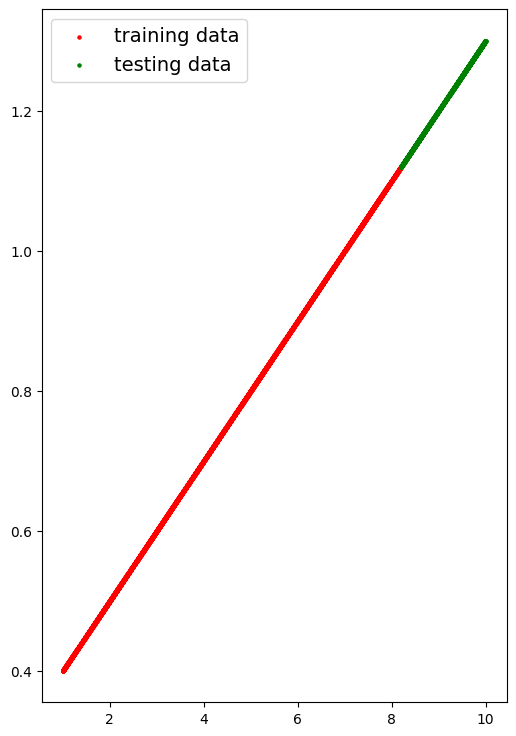

In [26]:
graphy()

###Building model to fit data in the red line

In [40]:
from torch import nn


class linearregression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

  def forward(self,x:torch.Tensor) -> torch.tensor:
    return self.weight * hello + self.bias

so we have few building blocks of pytorch that u have to understand

1. torch.nn(neural network)
2. torch.parameter
3. torch.Module
4. torch.optim = optimiser
5. def forward() - > this means what is gonna happen to stuff in computation

In [41]:
torch.manual_seed(69)

model_bro = linearregression()

list(model_bro.parameters())

[Parameter containing:
 tensor([-0.5259], requires_grad=True),
 Parameter containing:
 tensor([-2.6043], requires_grad=True)]

In [33]:
model_bro.state_dict()

OrderedDict([('weight', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

In [34]:
### alright so untill here we made some checking as to how the data models is being done


lets do predictions

In [55]:
with torch.inference_mode():
  y_preds = model_bro(hello_test)


y_preds

tensor([[-3.1302],
        [-3.1307],
        [-3.1312],
        ...,
        [-7.8616],
        [-7.8621],
        [-7.8626]])

ValueError: x and y must be the same size

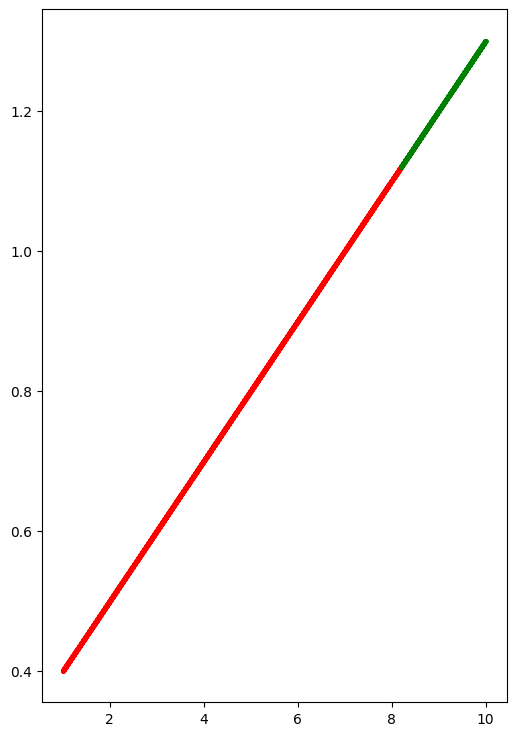

In [63]:
graphy(predictions=y_preds)



Training the ml model apparently sizes are same but not same

In [64]:
list (model_bro.parameters())

[Parameter containing:
 tensor([-0.5259], requires_grad=True),
 Parameter containing:
 tensor([-2.6043], requires_grad=True)]

In [65]:
#######loss function and optimiser being set up less go

loss function and optimiser come in both pair in pytorch

In [68]:
loos =nn.L1Loss()

optimo = torch.optim.SGD(params=model_bro.parameters(),
                         lr=0.0)# lr  is learning rate

In [69]:
 ### building a loop in pytorch